<a href="https://colab.research.google.com/github/FernandoLajus/Python_pd_bootcamp/blob/main/Bootcamp_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Series Methods and Handling**

In [4]:
import pandas as pd
import numpy as np

In [5]:
path = 'drinks.csv'   

In [6]:
# O método 'read_csv' tem diversos parâmetros. Uso alguns deles nos blocos seguintes
pd_drinks = pd.read_csv(path)
pd_drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


In [7]:
pd_drinks.shape

(193, 5)

In [8]:
# Aqui uso alguns parâmetros diferentes do método 'read_csv'
pd_total_litres = pd.read_csv(path,index_col=['country'],usecols=['country','total_litres_of_pure_alcohol'])

In [9]:
pd_total_litres.head()

,total_litres_of_pure_alcohol
country,
Afghanistan,NaN
Albania,4.9
Algeria,0.7
Andorra,12.4
Angola,5.9


In [10]:
# Tipo DataFrame
type(pd_total_litres)

pandas.core.frame.DataFrame

In [11]:
# Transformar um Dataframe em uma Series, ou seja, uma objeto multidimensional em um vetor unidimensional, através do
#parâmetro 'squeeze' do método 'read_csv'
pd_total_litres_S = pd.read_csv('drinks.csv', index_col=['country'],usecols=['country','total_litres_of_pure_alcohol'],squeeze=True)

In [12]:
# Tipo Series
type(pd_total_litres_S)

pandas.core.series.Series

In [13]:
pd_total_litres_S.head()

country
Afghanistan     NaN
Albania         4.9
Algeria         0.7
Andorra        12.4
Angola          5.9
Name: total_litres_of_pure_alcohol, dtype: float64

In [14]:
pd_total_litres_S.loc['Argentina']

8.3

In [15]:
#Monotonicity = se existe uma "direção" para os elementos numéricos
pd_total_litres_S.is_monotonic

False

In [16]:
print(pd_total_litres_S.size) # Conta todos os casos, ou linhas
print(pd_total_litres_S.count()) ## Conta todos os casos excluindo valores NaN

193
180


In [17]:
pd_total_litres_S.isnull() # O método itera sobre todos os itens

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen          False
Zambia         False
Zimbabwe       False
Name: total_litres_of_pure_alcohol, Length: 193, dtype: bool

In [18]:
[pd_total_litres_S.isnull()] # Retorna só os itens que respodem como True 

[country
 Afghanistan     True
 Albania        False
 Algeria        False
 Andorra        False
 Angola         False
                ...  
 Venezuela      False
 Vietnam        False
 Yemen          False
 Zambia         False
 Zimbabwe       False
 Name: total_litres_of_pure_alcohol, Length: 193, dtype: bool]

In [19]:
pd_total_litres_S[pd_total_litres_S.isnull()].index # retorna só o indexador

Index(['Afghanistan', 'Bangladesh', 'North Korea', 'Iran', 'Kuwait', 'Libya',
       'Maldives', 'Marshall Islands', 'Mauritania', 'Monaco', 'Pakistan',
       'San Marino', 'Somalia'],
      dtype='object', name='country')

In [20]:
list(pd_total_litres_S[pd_total_litres_S.isnull()].index) # assim posso criar uma lista com o nome dos países


['Afghanistan',
 'Bangladesh',
 'North Korea',
 'Iran',
 'Kuwait',
 'Libya',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Pakistan',
 'San Marino',
 'Somalia']

In [21]:
len(list(pd_total_litres_S[pd_total_litres_S.isnull()].index)) # tamanho da lista

13

In [22]:
list(pd_total_litres_S[pd_total_litres_S.notnull()].index) ## todos os valores não nulos

['Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua & Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia-Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 "Cote d'Ivoire",
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 'DR Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iraq'

In [23]:
len(list(pd_total_litres_S[pd_total_litres_S.notnull()].index)) # contagem dos valores não nulos

180

In [24]:
# Todos os paíse que não tem valores nulos
alcohol_servings = pd_total_litres_S[pd_total_litres_S.notnull()]

In [25]:
alcohol_servings.head()

country
Albania               4.9
Algeria               0.7
Andorra              12.4
Angola                5.9
Antigua & Barbuda     4.9
Name: total_litres_of_pure_alcohol, dtype: float64

In [26]:
# Soma do consumo de alcool para todos os países com valores não nulos
total_alcohol_consumption = alcohol_servings.sum()

In [27]:
# Quantidade de países que servem menos de um litro de alcool
len(alcohol_servings[alcohol_servings <1])

27

In [28]:
# Soma do total de alcool servidos para os países que servem menos de um litro de alcool
alcohol_servings[alcohol_servings<1].sum()

10.6

In [29]:
pd_total_litres_S.dropna # Retira todos os NaN

<bound method Series.dropna of country
Afghanistan     NaN
Albania         4.9
Algeria         0.7
Andorra        12.4
Angola          5.9
               ... 
Venezuela       7.7
Vietnam         2.0
Yemen           0.1
Zambia          2.5
Zimbabwe        4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64>

In [30]:
pd_total_litres_S.fillna(value=999, inplace=False) # Insera um valor definido em todos os casos NaN

country
Afghanistan    999.0
Albania          4.9
Algeria          0.7
Andorra         12.4
Angola           5.9
               ...  
Venezuela        7.7
Vietnam          2.0
Yemen            0.1
Zambia           2.5
Zimbabwe         4.7
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

In [31]:
# Descriptive statistics in Pandas
print(f'Mean: {pd_total_litres_S.mean()}')
print(f'Median: {pd_total_litres_S.median()}') 
print(f'Mode: {pd_total_litres_S.mode()}')
print(f'Count:{pd_total_litres_S.count()}')
print(f'Sum: {pd_total_litres_S.sum()}')
print(f'Quantile: {pd_total_litres_S.quantile(q=0.25)}')
print(f'Min: {pd_total_litres_S.min()}')
print(f'Max: {pd_total_litres_S.max()}')
print(f'Standart Deviation: {pd_total_litres_S.std()}')

Mean: 4.357777777777779
Median: 3.8499999999999996
Mode: 0    0.1
dtype: float64
Count:180
Sum: 784.3999999999999
Quantile: 1.3749999999999998
Min: 0.1
Max: 14.4
Standart Deviation: 3.454136141881824


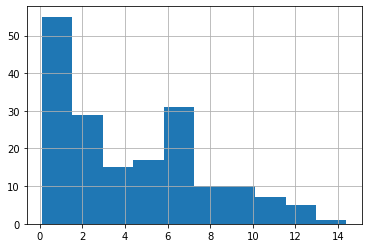

In [32]:
pd_total_litres_S.hist()

In [33]:
# Este método retorna todas as estatísticas descritivas
pd_total_litres_S.describe()

count    180.000000
mean       4.357778
std        3.454136
min        0.100000
25%        1.375000
50%        3.850000
75%        6.700000
max       14.400000
Name: total_litres_of_pure_alcohol, dtype: float64

In [34]:
print(pd_total_litres_S.value_counts()) # Retorna a contagem dos diferentes valores
print(pd_total_litres_S.value_counts(normalize=True)) # Retorna a contagem relativa (x/total de casos) dos diferentes valores

0.1     7
2.2     6
1.0     6
1.5     5
6.3     5
       ..
14.4    1
4.1     1
1.6     1
5.7     1
3.1     1
Name: total_litres_of_pure_alcohol, Length: 82, dtype: int64
0.1     0.038889
2.2     0.033333
1.0     0.033333
1.5     0.027778
6.3     0.027778
          ...   
14.4    0.005556
4.1     0.005556
1.6     0.005556
5.7     0.005556
3.1     0.005556
Name: total_litres_of_pure_alcohol, Length: 82, dtype: float64


In [35]:
print(pd_total_litres_S.idxmax()) # Index do valor máximo
print(pd_total_litres_S.idxmin()) # Index do valor mínimo
print(pd_total_litres_S[pd_total_litres_S == pd_total_litres_S.min()]) # Lista dos menores valores (se tiver mais que um)

Belarus
Comoros
country
Comoros         0.1
Indonesia       0.1
Myanmar         0.1
Niger           0.1
Saudi Arabia    0.1
Timor-Leste     0.1
Yemen           0.1
Name: total_litres_of_pure_alcohol, dtype: float64


In [36]:
pd_total_litres_S.sort_values(ascending=False) # Organizar os valores em orden crescente ou descrescente

country
Belarus       14.4
Lithuania     12.9
Andorra       12.4
Grenada       11.9
France        11.8
              ... 
Mauritania     NaN
Monaco         NaN
Pakistan       NaN
San Marino     NaN
Somalia        NaN
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

In [37]:
#Retorna o conjunto N dos maiores e menores valores. Ex: top10
print(pd_total_litres_S.nlargest(n=7))
print(pd_total_litres_S.nsmallest(n=7))

country
Belarus               14.4
Lithuania             12.9
Andorra               12.4
Grenada               11.9
Czech Republic        11.8
France                11.8
Russian Federation    11.5
Name: total_litres_of_pure_alcohol, dtype: float64
country
Comoros         0.1
Indonesia       0.1
Myanmar         0.1
Niger           0.1
Saudi Arabia    0.1
Timor-Leste     0.1
Yemen           0.1
Name: total_litres_of_pure_alcohol, dtype: float64


In [38]:
#Categoriza pelo valor do Index. O parâmetro inplace faz uma atribuição do resultado para a variável. Não é só uma cópia
pd_total_litres_S.sort_index(inplace= True)

In [39]:
top_13= pd_total_litres_S[pd_total_litres_S>10]

In [40]:
print(top_13)
print(top_13.nsmallest(n=6))

country
Andorra               12.4
Belarus               14.4
Czech Republic        11.8
France                11.8
Germany               11.3
Grenada               11.9
Hungary               11.3
Ireland               11.4
Lithuania             12.9
Luxembourg            11.4
Portugal              11.0
Russian Federation    11.5
Slovakia              11.4
Name: total_litres_of_pure_alcohol, dtype: float64
country
Portugal      11.0
Germany       11.3
Hungary       11.3
Ireland       11.4
Luxembourg    11.4
Slovakia      11.4
Name: total_litres_of_pure_alcohol, dtype: float64


In [41]:
print(f'The descriptive statistics for the top 7 alcohol drinkings countries are:\nMean: {top_13.nsmallest(n=6).mean()}\nMedian: {top_13.nsmallest(n=6).median()}\nStandart Deviation: {top_13.nsmallest(n=6).std()}')

The descriptive statistics for the top 7 alcohol drinkings countries are:
Mean: 11.299999999999999
Median: 11.350000000000001
Standart Deviation: 0.15491933384829681


In [42]:
# Método que adiciona novos valores ao dataset. Fill_value especifica se é para deixar os outros valores iguais
mais_paises = pd.Series({'France': 5})
top_13.add(mais_paises,fill_value = 0)

Andorra               12.4
Belarus               14.4
Czech Republic        11.8
France                16.8
Germany               11.3
Grenada               11.9
Hungary               11.3
Ireland               11.4
Lithuania             12.9
Luxembourg            11.4
Portugal              11.0
Russian Federation    11.5
Slovakia              11.4
dtype: float64

In [43]:
top_13.sort_index(inplace=True)
print(top_13)

country
Andorra               12.4
Belarus               14.4
Czech Republic        11.8
France                11.8
Germany               11.3
Grenada               11.9
Hungary               11.3
Ireland               11.4
Lithuania             12.9
Luxembourg            11.4
Portugal              11.0
Russian Federation    11.5
Slovakia              11.4
Name: total_litres_of_pure_alcohol, dtype: float64


In [44]:
#Soma acumulado de todos os casos. Soma cada um na ordem indexada
pd_total_litres_S.cumsum()

country
Afghanistan      NaN
Albania          4.9
Algeria          5.6
Andorra         18.0
Angola          23.9
               ...  
Venezuela      775.1
Vietnam        777.1
Yemen          777.2
Zambia         779.7
Zimbabwe       784.4
Name: total_litres_of_pure_alcohol, Length: 193, dtype: float64

In [45]:
top_5 = pd_total_litres_S.sort_values(ascending=False).head(5)
top_5

country
Belarus           14.4
Lithuania         12.9
Andorra           12.4
Grenada           11.9
Czech Republic    11.8
Name: total_litres_of_pure_alcohol, dtype: float64

In [46]:
# O método Diff é especialmente utilizado e importante para trabalhar como variáveis de tempo. É a diferença entre os
#valores anteriores. O parâmetro periods é usado para definir quantas "casas" a conta irá pular entre cada elemento.
# Diff padrão é igual a 'periods=1'
top_5.diff()

country
Belarus           NaN
Lithuania        -1.5
Andorra          -0.5
Grenada          -0.5
Czech Republic   -0.1
Name: total_litres_of_pure_alcohol, dtype: float64

#**Formas de iterar sobre a Series**

In [47]:
for i in top_5:
  print(i)

14.4
12.9
12.4
11.9
11.8


In [48]:
for i in top_5.index:
  print(i, top_5[i])

Belarus 14.4
Lithuania 12.9
Andorra 12.4
Grenada 11.9
Czech Republic 11.8


In [49]:
for i in top_5.items():
  print(i)

('Belarus', 14.4)
('Lithuania', 12.9)
('Andorra', 12.4)
('Grenada', 11.9)
('Czech Republic', 11.8)


#**Filtros:**
-filter

-regex

-like (sql)

-where (sql)

-mask


In [50]:
pd_total_litres_S.filter(regex='^V',)

country
Vanuatu      0.9
Venezuela    7.7
Vietnam      2.0
Name: total_litres_of_pure_alcohol, dtype: float64

In [51]:
pd_total_litres_S.filter(regex='V',)

country
Cabo Verde                      4.0
St. Vincent & the Grenadines    6.3
Vanuatu                         0.9
Venezuela                       7.7
Vietnam                         2.0
Name: total_litres_of_pure_alcohol, dtype: float64

In [52]:
pd_total_litres_S.filter(like="zil")

country
Brazil       7.2
Swaziland    4.7
Name: total_litres_of_pure_alcohol, dtype: float64

In [53]:
print(pd_total_litres_S[pd_total_litres_S > 10].filter(like='G'))
print('\n')
print(pd_total_litres_S[pd_total_litres_S > 10].filter(regex='nce'))

country
Germany    11.3
Grenada    11.9
Name: total_litres_of_pure_alcohol, dtype: float64


country
France    11.8
Name: total_litres_of_pure_alcohol, dtype: float64


In [54]:
pd_total_litres_S.where(pd_total_litres_S > 12, other='Menor do que 12')

country
Afghanistan    Menor do que 12
Albania        Menor do que 12
Algeria        Menor do que 12
Andorra                   12.4
Angola         Menor do que 12
                    ...       
Venezuela      Menor do que 12
Vietnam        Menor do que 12
Yemen          Menor do que 12
Zambia         Menor do que 12
Zimbabwe       Menor do que 12
Name: total_litres_of_pure_alcohol, Length: 193, dtype: object

In [55]:
pd_total_litres_S.where(pd_total_litres_S > 12).dropna()

country
Andorra      12.4
Belarus      14.4
Lithuania    12.9
Name: total_litres_of_pure_alcohol, dtype: float64

In [56]:
# É possível usar uma condicional interadora, como a função anônima lambda
pd_total_litres_S.where(lambda x: x >12).dropna()

country
Andorra      12.4
Belarus      14.4
Lithuania    12.9
Name: total_litres_of_pure_alcohol, dtype: float64

In [57]:
# Retorna todos os casos que não estão especificados no filtor mask.
# Faz o oposto do filtro Where
pd_total_litres_S.mask(pd_total_litres_S > 12).dropna()

country
Albania              4.9
Algeria              0.7
Angola               5.9
Antigua & Barbuda    4.9
Argentina            8.3
                    ... 
Venezuela            7.7
Vietnam              2.0
Yemen                0.1
Zambia               2.5
Zimbabwe             4.7
Name: total_litres_of_pure_alcohol, Length: 177, dtype: float64

In [58]:
pd_total_litres_S.mask(lambda x: x >=0.3).dropna()

country
Comoros         0.1
Egypt           0.2
Guinea          0.2
Indonesia       0.1
Iraq            0.2
Myanmar         0.1
Nepal           0.2
Niger           0.1
Saudi Arabia    0.1
Timor-Leste     0.1
Yemen           0.1
Name: total_litres_of_pure_alcohol, dtype: float64

#Métodos de modificação:

-Update

-Apply

-map

In [59]:
new_values = pd_total_litres_S.copy()

In [60]:
# Altera uma lista de valores na Series
new_values.update(pd.Series(data=[21,41,32], index=['Argentina','Brazil','Australia']))
new_values[a > 20].sort_index()

NameError: ignored

In [ ]:
new_values.nlargest().sort_index()

In [ ]:
new_values

In [ ]:
print(new_values.apply(lambda x: x**2).nlargest(n=4))
print(new_values.apply(np.square).nlargest(n=4))

In [62]:
def multiply_by_4 (x):
  return x * 4

In [63]:
new_values.map(multiply_by_4).nlargest(n=4)

country
Brazil       164.0
Australia    128.0
Argentina     84.0
Belarus       57.6
Name: total_litres_of_pure_alcohol, dtype: float64

#**Challenges**

In [ ]:
#Read the drinks.csv file again, this time bringing the "beers_servings" into a new series with country acting
#as the index. Assing this series to a variable "beers"

In [67]:
data_set = pd.read_csv('drinks.csv')
data_set.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9


In [68]:
beers_ds = pd.read_csv('drinks.csv',index_col=['country'],usecols=['country','beer_servings'],squeeze=True)
beers = pd.Series(beers_ds)

In [70]:
type(beers)

pandas.core.series.Series

In [ ]:
beers.sort_index()

In [ ]:
# Calculate the mean, median and standart deviation of beer_servings in beers
#Is the distribution right of left skewed?

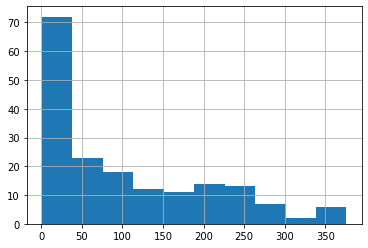

In [76]:
beers.hist() #The distribution is left skewed, meaning it will have a bigger mean than a median

In [77]:
#We can confirm such conclusion in the following
print(f'The mean, median and standart deviations are:\nMean: {beers.mean()}\nMedian: {beers.median()}\nStandart Deviation: {beers.std()}')

The mean, median and standart deviations are:
Mean: 102.87078651685393
Median: 60.0
Standart Deviation: 100.64571267934778


In [86]:
#Slice the first 10 countries. Are theses relatively large or small to the rest of the sample. Compare the mean and the median
print(f'**Mean and median of the first ten countries**\nMean: {beers.iloc[:10].mean()}\nMedian: {beers.iloc[:10].median()}\n**Mean and median of the full dataset**\nMean: {beers.mean()}\nMedian: {beers.median()}')

**Mean and median of the first ten countries**
Mean: 149.11111111111111
Median: 193.0
**Mean and median of the full dataset**
Mean: 102.87078651685393
Median: 60.0


In [ ]:
# Uma outra forma de entender os dois grupos de dados é pelo seu z-score. O z-score mostra o quão distante dada observação está da média geral
# do dataset.

In [96]:
z_score = (beers - beers.mean()) / beers.std()
z_score

country
Afghanistan         NaN
Albania       -0.137818
Algeria       -0.773712
Andorra        1.412174
Angola         1.133970
                 ...   
Venezuela      2.286528
Vietnam        0.080771
Yemen         -0.962493
Zambia        -0.704161
Zimbabwe      -0.386214
Name: beer_servings, Length: 193, dtype: float64

In [106]:
print(z_score.max())
print(z_score.idxmax())
print(beers['Namibia'])

2.7137689844109123
Namibia
376.0
